# Japan Shinkansen Location Exploration

Coded by Luna McBride

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from mpl_toolkits.basemap import Basemap #Plot onto map
from geopy.geocoders import Nominatim #Get coordinates
import matplotlib.pyplot as plt #Plotting
%matplotlib inline

plt.rcParams['figure.figsize'] = (15,10) #Set the default figure size
plt.style.use('ggplot') #Set the plotting method

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shinkansen-stations-in-japan/Shinkansen_stations_inJapan.csv


In [2]:
station = pd.read_csv("../input/shinkansen-stations-in-japan/Shinkansen_stations_inJapan.csv") #Load the station data
station.head() #Take a peek at the data

,Station_Name,Shinkansen_Line,Year,Prefecture,Distance from Tokyo st,Company
0,Tokyo,Tokaido_Shinkansen,1964,Tokyo,0.0,JR_Central
1,Shinagawa,Tokaido_Shinkansen,2003,Tokyo,6.8,JR_Central
2,Shin-Yokohama,Tokaido_Shinkansen,1964,Kanagawa,28.8,JR_Central
3,Odawara,Tokaido_Shinkansen,1964,Kanagawa,83.9,JR_Central
4,Atami,Tokaido_Shinkansen,1964,Shizuoka,104.6,JR_Central


In [3]:
print(len(station.index))

108


---

# Check for Null Values

In [4]:
print(station.isnull().any()) #Check for null values

Station_Name              False
Shinkansen_Line           False
Year                      False
Prefecture                False
Distance from Tokyo st    False
Company                   False
dtype: bool


There are no null values.

---

# Map the Stations

In [5]:
geolocator = Nominatim(user_agent = "my_user_agent") #Build a model to get LatLong data
lat = [] #List to hold latitude data
lon = [] #List to hold longitude data

#Fix up some names so the geolocator did not have problems
station["Station_Name"] = station["Station_Name"].apply(lambda x: "Shizukuishi" if x == "Shizukuichi" 
                                                        else ("Shin-Hakodate-Hokuto" if x == "Shin-Hakodatehokuto" else x))

#For each station, give the coordinates
for stat in station["Station_Name"]:
    
    #Hard code Shin-Tamana, which was throwing errors for some reason
    if stat == "Shin-Tamana":
        lat.append(32.9425) #Append the latitude
        lon.append(130.5736) #Append the longitude
        
    #Hard code Tokyo, as for some reason it keeps getting equated to somewhere in Poland
    elif stat == "Tokyo":
        lat.append(35.6812) #Append the latitude
        lon.append(139.7671) #Append the longitude
    
    #Hard code Asa, since the geolocator got it confused with Asha in Russia for some reason
    elif stat == "Asa":
        lat.append(34.0540) #Append the latitude
        lon.append(131.1606) #Append the longitude
        
    #Hard code Shin-Fuji, since it equates it with somewhere near Nemuro in the locator
    elif stat == "Shin-Fuji":
        lat.append(35.1420) #Append the latitude
        lon.append(138.6636) #Append the longitude
        
    #If the station is not one of those weird ones
    else:
        loc = geolocator.geocode(stat + " Station") #Find the station
        lat.append(loc.latitude) #Append its latitude
        lon.append(loc.longitude) #Append its longitude

In [6]:
station["Latitude"] = lat #Put the latitude into the dataset
station["Longitude"] = lon #Put the longitude into the dataset

#Print the min and max of the metrics to make sure the range is right
print("LAT: ", station["Latitude"].min(), ", ", station["Latitude"].max())
print("LON: ", station["Longitude"].min(), ", ", station["Longitude"].max())

station.head() #Take a peek at the dataset

LAT:  31.5836951 ,  41.9047884
LON:  130.42108450977403 ,  141.4882959


,Station_Name,Shinkansen_Line,Year,Prefecture,Distance from Tokyo st,Company,Latitude,Longitude
0,Tokyo,Tokaido_Shinkansen,1964,Tokyo,0.0,JR_Central,35.681200,139.767100
1,Shinagawa,Tokaido_Shinkansen,2003,Tokyo,6.8,JR_Central,35.629368,139.739269
2,Shin-Yokohama,Tokaido_Shinkansen,1964,Kanagawa,28.8,JR_Central,35.508817,139.617528
3,Odawara,Tokaido_Shinkansen,1964,Kanagawa,83.9,JR_Central,35.263676,139.150229
4,Atami,Tokaido_Shinkansen,1964,Shizuoka,104.6,JR_Central,35.089920,139.059891


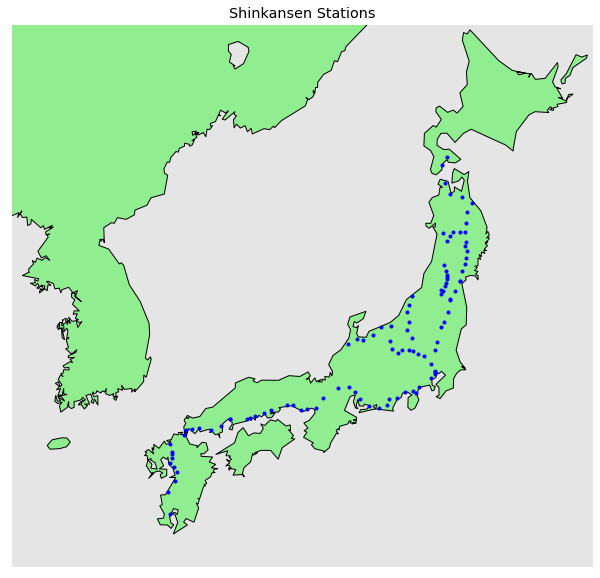

In [7]:
lat = list(station["Latitude"]) #Get the list of latitudes
lon = list(station["Longitude"]) #Get the list of longitudes

plt.title("Shinkansen Stations") #Add a title for Japan

#Set a basemap for Japan
mJP = Basemap(width = 1875000, height = 1750000, projection = "lcc",
            resolution = "l", lat_1 = 33.0, lat_2 = 43.0, lat_0 = 38.0, lon_0 = 135.0)

mJP.drawcoastlines() #Draw the coastlines
mJP.fillcontinents(color = "lightgreen") #Make the land light green
xlon, ylat = mJP(lon, lat) #Fit the coordinates to fit with the map
mJP.plot(xlon, ylat, "b.") #Plot Japan with our station

---

# Station by Company

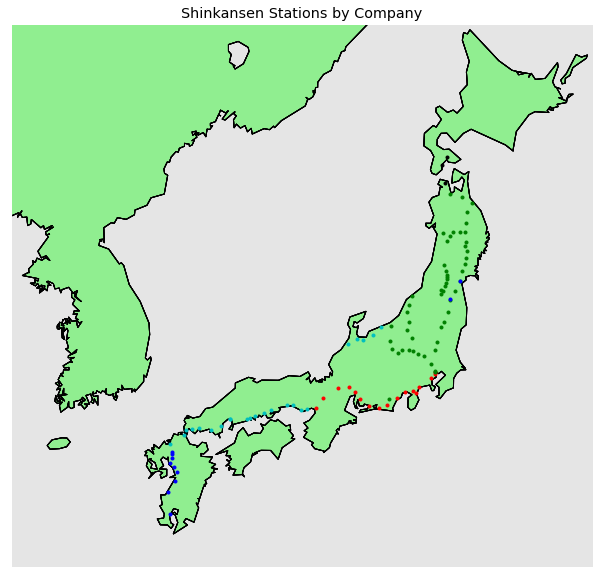

In [8]:
colors = ["r.", "c.", "g.", "b.", "k."] #Add different colors for the different companies

plt.title("Shinkansen Stations by Company") #Add a title for Japan
i = 0 #Set an iterator variable for the color

#For each unique company, plot its stations
for comp in station["Company"].unique():
    newStat = station.loc[station["Company"] == comp] #Get the station of the companies
    lat = list(newStat["Latitude"]) #Get the list of latitudes
    lon = list(newStat["Longitude"]) #Get the list of longitudes


    #Set a basemap for Japan
    mJP = Basemap(width = 1875000, height = 1750000, projection = "lcc",
                resolution = "l", lat_1 = 33.0, lat_2 = 43.0, lat_0 = 38.0, lon_0 = 135.0)

    mJP.drawcoastlines() #Draw the coastlines
    mJP.fillcontinents(color = "lightgreen") #Make the land light green
    xlon, ylat = mJP(lon, lat) #Fit the coordinates to fit with the map
    mJP.plot(xlon, ylat, colors[i]) #Plot Japan with our station data
    i += 1

This program appears to have some problems that display in the plotting (namely some Kyushu stations near Sendai). Though, this is better than paying for the google maps API version. Some of it is partially some oddity in how the routes are distinguished, as well as the high bulk of stations in central Honshu

---

# New vs Old Stations (1900's vs 2000's)

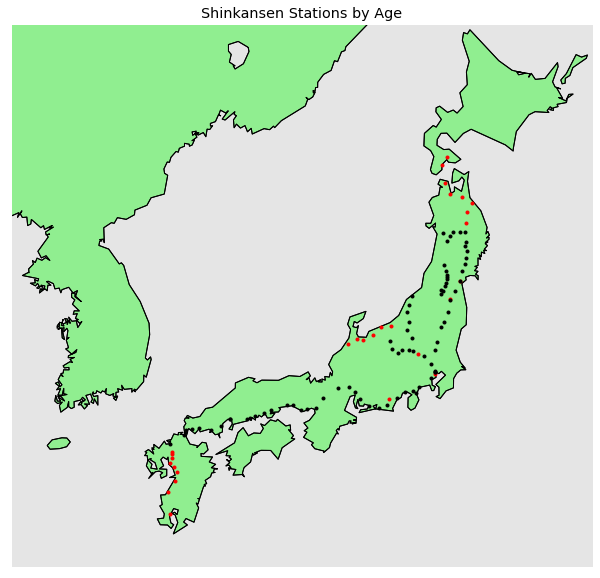

In [9]:
colors = ["r.", "k."] #Add colors
plt.title("Shinkansen Stations by Age") #Add a title for Japan
statAge = [station.loc[station["Year"] > 2000], station.loc[station["Year"] < 2000]] #Put a list of stations built after and before 2000 respectively

#For each age in the list above, plot the stations in the new (red) or old (black)
for i in range(0,2):
    newStat = statAge[i] #Get the age data
    lat = list(newStat["Latitude"]) #Get the list of latitudes
    lon = list(newStat["Longitude"]) #Get the list of longitudes


    #Set a basemap for Japan
    mJP = Basemap(width = 1875000, height = 1750000, projection = "lcc",
                resolution = "l", lat_1 = 33.0, lat_2 = 43.0, lat_0 = 38.0, lon_0 = 135.0)

    mJP.drawcoastlines() #Draw the coastlines
    mJP.fillcontinents(color = "lightgreen") #Make the land light green
    xlon, ylat = mJP(lon, lat) #Fit the coordinates to fit with the map
    mJP.plot(xlon, ylat, colors[i]) #Plot Japan with our station data

It looks like the stations before 2000 (black) were built mostly to connect the majority of Honshu. The newer ones (red) appear to mostly be a few additional stops on old routes, as well as connecting to Kyushu, Hokkaido (only slightly, but to be fair, Hokkaido's train infrastructure is not as deeply connected as the rest of Japan), and through to Kanazawa and Aomori on Honshu.